https://www.kaggle.com/competitions/porto-seguro-safe-driver-prediction/overview

In [1]:
import pandas as pd

data_path = "./data/"

train = pd.read_csv(data_path+'train.csv', index_col = 'id')
test = pd.read_csv(data_path+ 'test.csv', index_col = 'id')
submission = pd.read_csv(data_path + 'sample_submission.csv', index_col='id')

train.shape, test.shape

((595212, 58), (892816, 57))

In [2]:
train.head().transpose()

id,7,9,13,16,17
target,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_01,2.000000,1.000000,5.000000,0.000000,0.000000
ps_ind_02_cat,2.000000,1.000000,4.000000,1.000000,2.000000
ps_ind_03,5.000000,7.000000,9.000000,2.000000,0.000000
ps_ind_04_cat,1.000000,0.000000,1.000000,0.000000,1.000000
ps_ind_05_cat,0.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_06_bin,0.000000,0.000000,0.000000,1.000000,1.000000
ps_ind_07_bin,1.000000,0.000000,0.000000,0.000000,0.000000
ps_ind_08_bin,0.000000,1.000000,1.000000,0.000000,0.000000
ps_ind_09_bin,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

<Axes: >

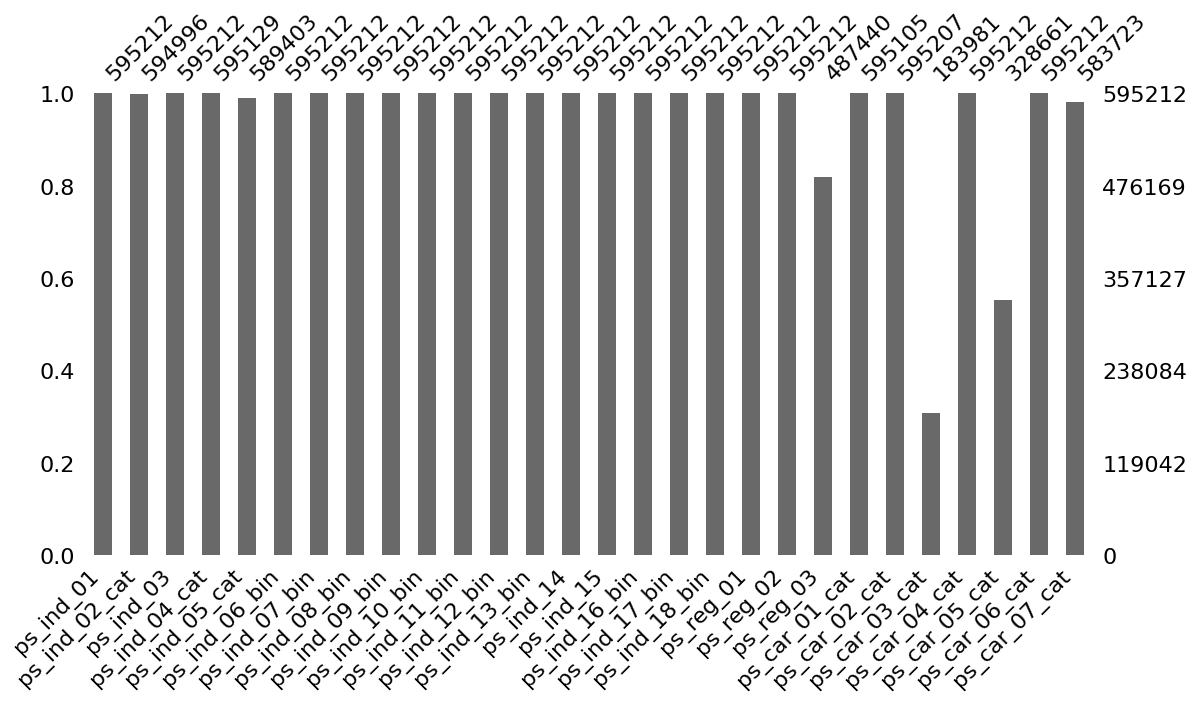

In [6]:
import numpy as np
import missingno as msno

train_copy = train.copy().replace(-1, np.NaN) #-1을 NaN으로 변경
msno.bar(df = train_copy.iloc[:,1:29], figsize = (13,6)) # 결측값 시각화

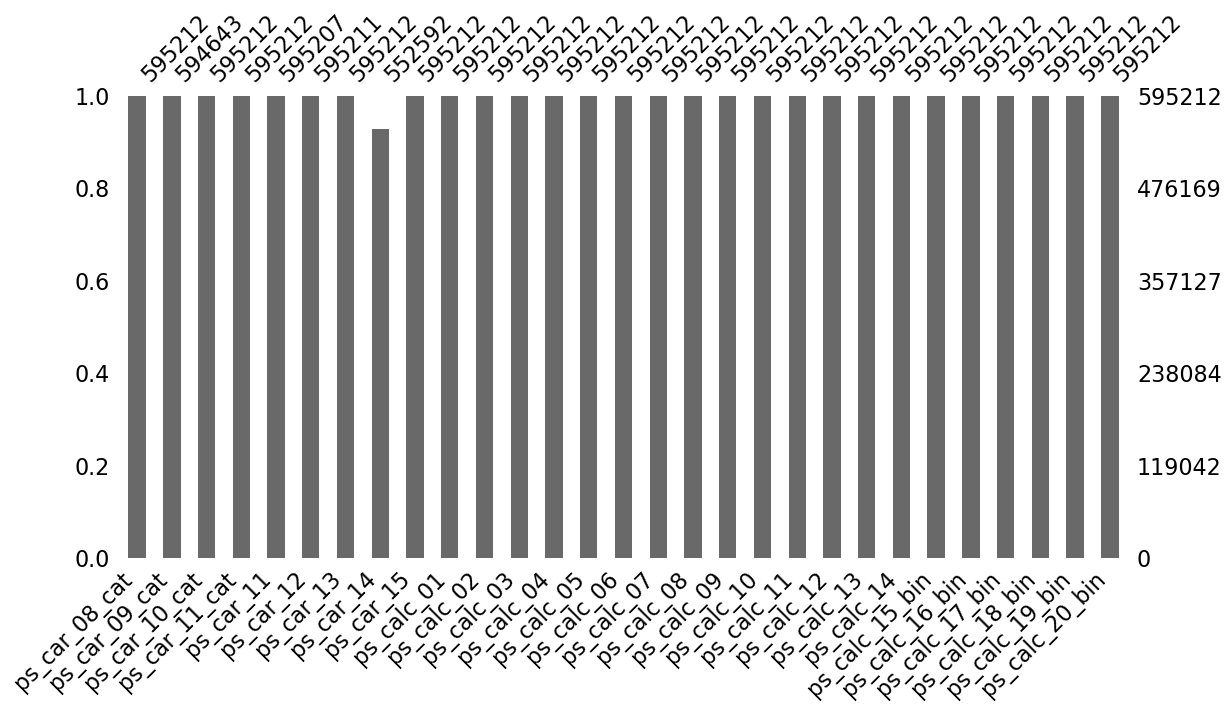

In [19]:
msno.bar(df=train_copy.iloc[:,29:], figsize=(13,6));

In [26]:
def resumetable(df):
    print(f'데이터셋 현상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns = ['데이터 타입'])
    summary['결측값 개수'] = (df == -1).sum().values
    summary['고윳값'] = df.nunique().values
    summary['데이터 종류'] = None
    for col in df.columns:
        if 'bin' in col or col == 'target':
            summary.loc[col, '데이터 종류'] = '이진형'
        elif 'cat' in col:
            summary.loc[col, '데이터 종류'] = '명목형'
        elif df[col].dtype == float:
            summary.loc[col, '데이터 종류'] = '연속형'
        elif df[col].dtype == int:
            summary.loc[col, '데이터 종류'] = '순서형'

    return summary


In [27]:
summary = resumetable(train)
summary

데이터셋 현상: (595212, 58)


,데이터 타입,결측값 개수,고윳값,데이터 종류
target,int64,0,2,이진형
ps_ind_01,int64,0,8,None
ps_ind_02_cat,int64,216,5,명목형
ps_ind_03,int64,0,12,None
ps_ind_04_cat,int64,83,3,명목형
ps_ind_05_cat,int64,5809,8,명목형
ps_ind_06_bin,int64,0,2,이진형
ps_ind_07_bin,int64,0,2,이진형
ps_ind_08_bin,int64,0,2,이진형
ps_ind_09_bin,int64,0,2,이진형


In [28]:
summary[summary['데이터 종류'] == '명목형'].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object')

In [29]:
summary[summary['데이터 타입'] == 'float64'].index

Index(['ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_12', 'ps_car_13',
       'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03'],
      dtype='object')

In [30]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Target Distribution')

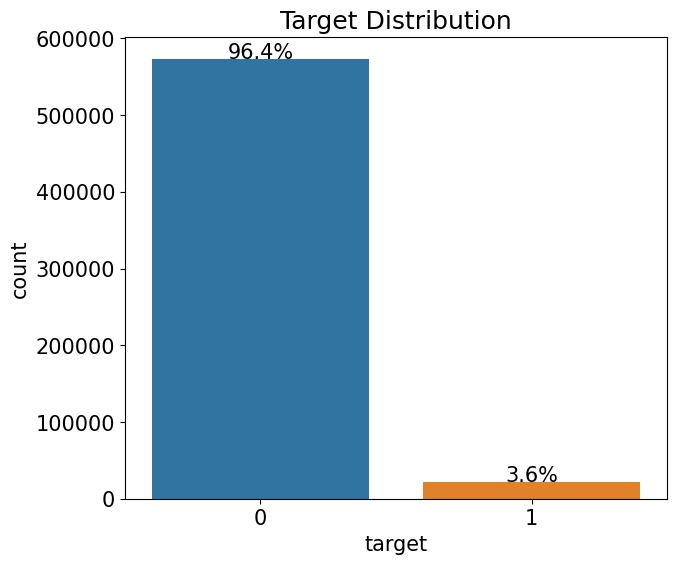

In [31]:
def write_percent(ax,total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100

        ax.text(left_coord + width/2.0,
                height + total_size * 0.001,
                '{:1.1f}%'.format(percent),
                ha= 'center')
        
mpl.rc('font', size = 15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x= 'target', data=train)
write_percent(ax,len(train))
ax.set_title('Target Distribution')

In [ ]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_feature(df, features, num_rows, num_cols, size = (12,18)):
    mpl.rc('font', size = 9)
    